In [1]:
!pip install datasets

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd # Import pandas to work with DataFrames

In [4]:
pip install ipywidgets --upgrade


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
from datasets import load_dataset

# load dataset 
dataset = load_dataset('unimelb-nlp/wikiann', 'fr')

# show structure (first 5 entries of training set)
print(dataset['train'][:5])

validation-00000-of-00001.parquet:   0%|          | 0.00/673k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/678k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

{'tokens': [['Saxifrage', 'faux', 'Orpin'], ['REDIRECTION', 'The', 'Lady', 'of', 'Rage'], ['Parti', 'libéral', 'du', 'Québec'], ['Après', 'deux', 'nuls', '(', 'Guingamp', 'et', 'Amiens', ')', 'et', 'deux', 'défaites', '(', 'Charleroi', 'et', 'Lokeren', ')', ',', 'les', 'hommes', 'Antoine', 'Kombouaré', 'se', 'reprennent', 'et', 'remportent', 'leurs', 'deux', 'dernières', 'confrontations', 'contre', 'UNFP', 'et', 'Sedan', '.'], ['Ernst', 'Vettori', 'Richard', 'Schallert', 'Franz', 'Neuländtner', 'Andreas', 'Felder']], 'ner_tags': [[5, 6, 6], [0, 1, 2, 2, 2], [3, 4, 4, 4], [0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0], [1, 2, 1, 2, 1, 2, 1, 2]], 'langs': [['fr', 'fr', 'fr'], ['fr', 'fr', 'fr', 'fr', 'fr'], ['fr', 'fr', 'fr', 'fr'], ['fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr', 'fr'

In [7]:
# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(dataset['train']) # Create a DataFrame named df

df.head() # Now you can call head() on df


,tokens,ner_tags,langs,spans
0,"[Saxifrage, faux, Orpin]","[5, 6, 6]","[fr, fr, fr]",[LOC: Saxifrage faux Orpin]
1,"[REDIRECTION, The, Lady, of, Rage]","[0, 1, 2, 2, 2]","[fr, fr, fr, fr, fr]",[PER: The Lady of Rage]
2,"[Parti, libéral, du, Québec]","[3, 4, 4, 4]","[fr, fr, fr, fr]",[ORG: Parti libéral du Québec]
3,"[Après, deux, nuls, (, Guingamp, et, Amiens, )...","[0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, ...","[fr, fr, fr, fr, fr, fr, fr, fr, fr, fr, fr, f...","[ORG: Guingamp, ORG: Amiens, ORG: Charleroi, O..."
4,"[Ernst, Vettori, Richard, Schallert, Franz, Ne...","[1, 2, 1, 2, 1, 2, 1, 2]","[fr, fr, fr, fr, fr, fr, fr, fr]","[PER: Ernst Vettori, PER: Richard Schallert, P..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tokens    20000 non-null  object
 1   ner_tags  20000 non-null  object
 2   langs     20000 non-null  object
 3   spans     20000 non-null  object
dtypes: object(4)
memory usage: 625.1+ KB


In [6]:
df.describe()

,tokens,ner_tags,langs,spans
count,20000,20000,20000,20000
unique,18111,2981,51,17255
top,"[', '', Honda, '', ']","[0, 0, 1, 2, 0, 0]","[fr, fr, fr, fr, fr]",[ORG: Honda]
freq,94,1187,4969,94


In [8]:
df.columns

Index(['tokens', 'ner_tags', 'langs', 'spans'], dtype='object')

In [9]:
# Examine entity distribution to show distribution of different entity types in the dataset:
entity_counts = df['ner_tags'].value_counts()
print(entity_counts)

ner_tags
[0, 0, 1, 2, 0, 0]                            1187
[3, 4, 4, 4]                                   750
[1, 2, 0, 0, 0]                                732
[3, 4, 4, 4, 4]                                679
[5, 6, 6, 6]                                   645
                                              ... 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 3, 4, 0]       1
[0, 3, 0, 0, 1]                                  1
[3, 4, 4, 0, 0, 0, 5, 0]                         1
[0, 5, 0, 0, 5, 0, 0]                            1
[0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0]       1
Name: count, Length: 2981, dtype: int64


In [10]:
# Check for class imbalance to identify if certain entity types are underrepresented:
entity_percentages = (entity_counts / len(df)) * 100
print(entity_percentages)


ner_tags
[0, 0, 1, 2, 0, 0]                            5.935
[3, 4, 4, 4]                                  3.750
[1, 2, 0, 0, 0]                               3.660
[3, 4, 4, 4, 4]                               3.395
[5, 6, 6, 6]                                  3.225
                                              ...  
[0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 3, 4, 0]    0.005
[0, 3, 0, 0, 1]                               0.005
[3, 4, 4, 0, 0, 0, 5, 0]                      0.005
[0, 5, 0, 0, 5, 0, 0]                         0.005
[0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0]    0.005
Name: count, Length: 2981, dtype: float64


In [11]:
# Analyze token length distribution to provide insights into the length of the individual tokens (words) in the dataset:
df['token_lengths'] = df['tokens'].apply(lambda x: [len(token) for token in x])
token_lengths = [length for lengths in df['token_lengths'] for length in lengths]
print(pd.Series(token_lengths).describe())
# count: total, mean: average length, std: standard deviation in characters, min: shortest token, max: longest token, %: percentage of tokens

count    136788.000000
mean          4.504364
std           3.455997
min           1.000000
25%           2.000000
50%           4.000000
75%           7.000000
max          40.000000
dtype: float64


In [12]:
# Visualize the entity distribution in the dataset by creating a horizontal bar plot:
# Get the label mapping from the dataset first, wo we can see the labels instead of just the numbers 0-6:
label_list = dataset['train'].features['ner_tags'].feature.names
label_mapping = {i: label for i, label in enumerate(label_list)}

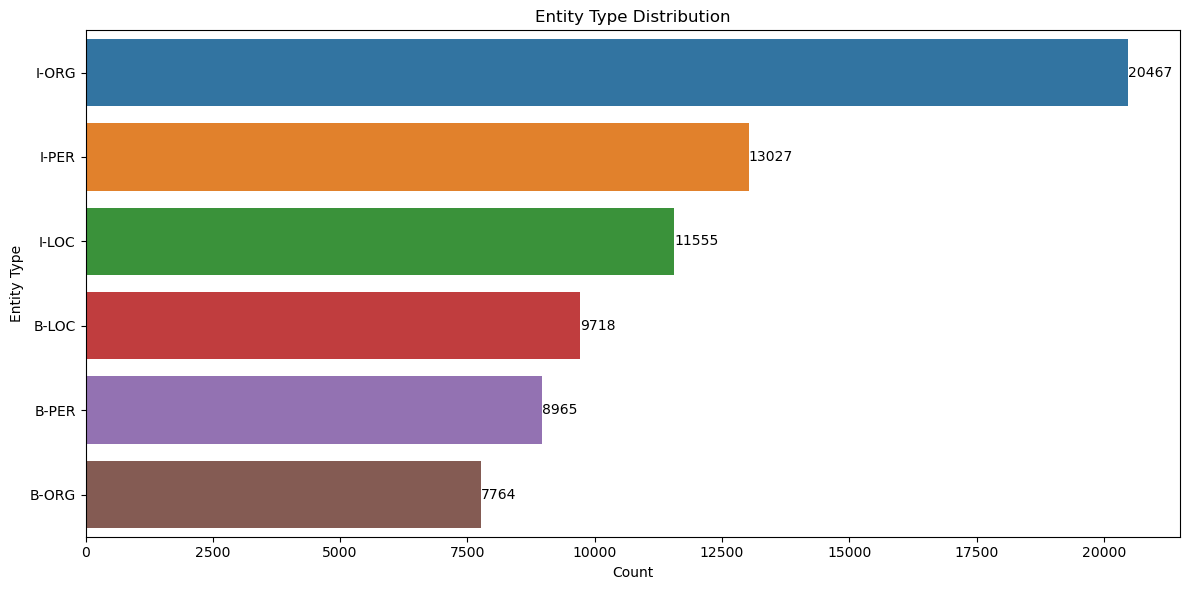

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each entity type
entity_counts = df['ner_tags'].apply(lambda x: [tag for tag in x if tag != 0]).explode().value_counts()

# Map numeric encodings to actual entity labels
entity_counts_labeled = entity_counts.rename(index=label_mapping)

# Create a horizontal bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=entity_counts_labeled.values, y=entity_counts_labeled.index, orient='h')

# Customize the plot
plt.title('Entity Type Distribution')
plt.xlabel('Count')
plt.ylabel('Entity Type')

# Add count labels to the end of each bar
for i, v in enumerate(entity_counts_labeled.values):
    plt.text(v + 0.1, i, str(v), va='center')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

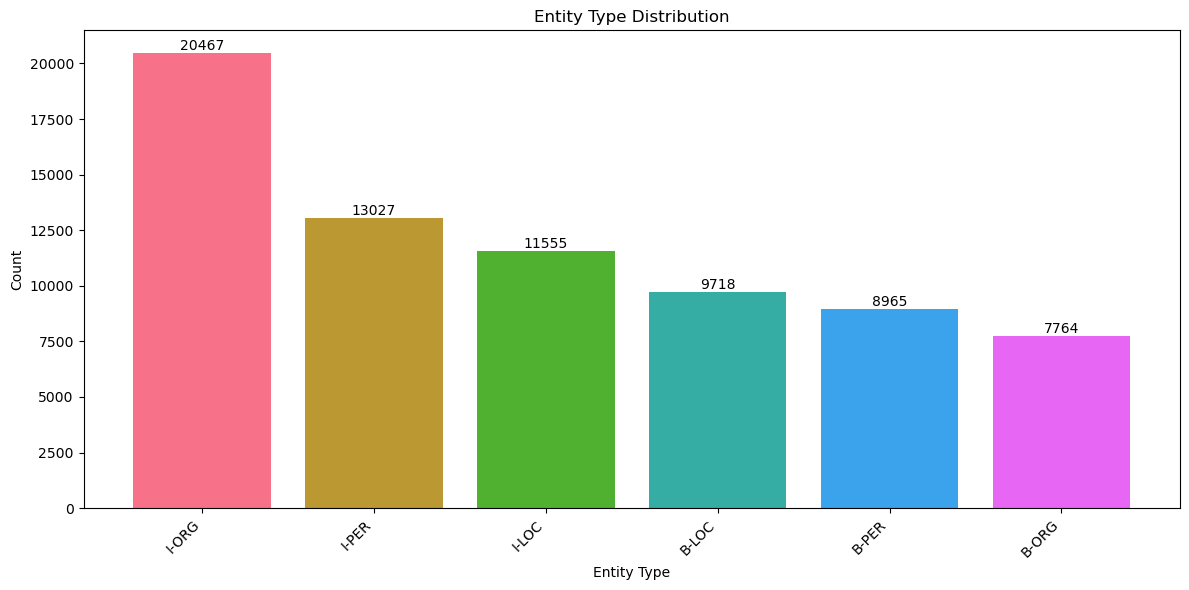

In [14]:
# alternative Darstellung :)
import matplotlib.pyplot as plt
import seaborn as sns

# First, let's create a mapping from numeric codes to entity labels
label_list = dataset['train'].features['ner_tags'].feature.names
label_mapping = {i: label for i, label in enumerate(label_list)}

# Now, let's map the entity counts to their actual labels
entity_counts_labeled = entity_counts.rename(index=label_mapping)

plt.figure(figsize=(12, 6))

# Use seaborn's color palette for distinct colors
colors = sns.color_palette("husl", len(entity_counts_labeled))

# Create the bar plot with different colors
bars = plt.bar(entity_counts_labeled.index, entity_counts_labeled.values, color=colors)

plt.title('Entity Type Distribution')
plt.xlabel('Entity Type')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [15]:
# Check for missing values to identify missing data in the dataset:
print(df.isnull().sum())

tokens           0
ner_tags         0
langs            0
spans            0
token_lengths    0
dtype: int64


In [16]:
# Examine unique tokens to give me an idea of the vocabulary size in the dataset:
unique_tokens = set([token for tokens in df['tokens'] for token in tokens])
print(f"Number of unique tokens: {len(unique_tokens)}")

Number of unique tokens: 30845


In [17]:
# Analyze sentence length distribution to get insight on the length of sentences in the dataset:
df['sentence_length'] = df['tokens'].apply(lambda x: len(x))
print(df['sentence_length'].describe())


count    20000.000000
mean         6.839400
std          4.261281
min          3.000000
25%          5.000000
50%          6.000000
75%          7.000000
max        187.000000
Name: sentence_length, dtype: float64
